<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/linear_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 1.1 Systems of Linear Equations – Study Guide

## 🔹 What is a Linear Equation?

It’s an equation where variables are not multiplied together or raised to powers.

Looks like: $ax + by + cz + \dots = d$

- $a$, $b$, $c$ are coefficients (just numbers in front of variables)
- $x$, $y$, $z$ are variables
- $d$ is a constant

## 🔹 What Is a System of Linear Equations?

A group of linear equations working together.

- Used to model real-world problems with more than one condition.
- Each equation adds a rule or constraint.

## 🔹 How Do You Know If It’s a Linear Equation?

- All variables are to the power of $1$
- No variable is multiplied by another variable
- Graph is a line (2D) or plane (3D)

## 🔹 What Is a Solution?

A solution is a set of values (like $x = 2$, $y = 1$) that make all equations in the system true.

- This set is called an *n*-tuple, like $(2, 1)$ or $(1, 3, 5)$

## 🔹 Geometric Types of Systems (What They Look Like)

- **One solution**: Lines cross at one point
- **No solution**: Lines are parallel
- **Infinite solutions**: Lines are the same (overlap)

## 🔹 Real-Life Examples

- Solving how many hours to work two jobs to earn a goal amount
- Figuring out ingredient amounts in a recipe
- Managing budgets or resources in business or projects

## 🧠 Mnemonic to Remember System Types:

**"One, None, Many"**

- One point, No point, Many points (solutions)


<bound method Axes3D.set of <Axes3D: xlabel='$x_1$', ylabel='$x_2$', zlabel='$x_3$'>>

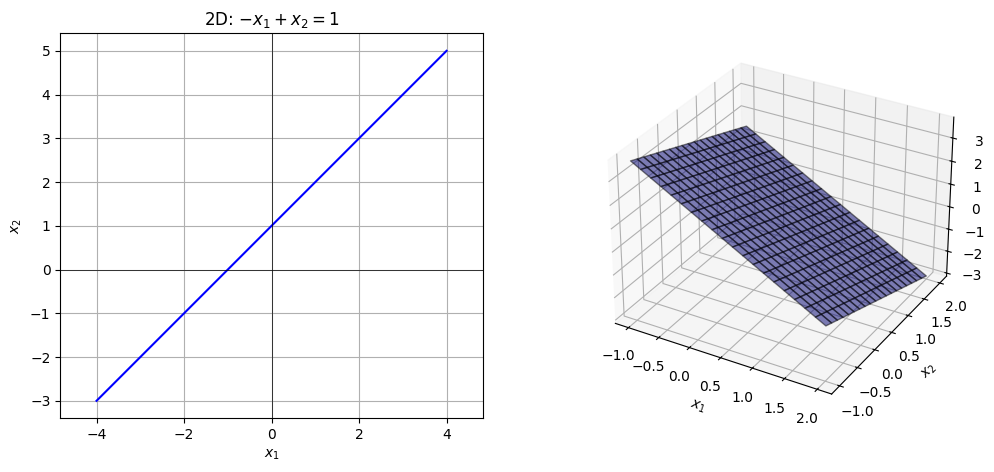

In [ ]:
#Figure 1.1.1: Graphs of linear equations in two and three dimensions.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 2D plot of -x1 + x2 = 1
plt.figure(figsize=(12, 5))

# Subplot for 2D
plt.subplot(1, 2, 1)
x1 = np.linspace(-4, 4, 100)
x2 = x1 + 1  # because -x1 + x2 = 1 => x2 = x1 + 1
plt.plot(x1, x2, 'b')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('2D: $-x_1 + x_2 = 1$')
plt.axis('equal')

# 3D plot of 6x1 + 3x2 + 4x3 = 6
ax = plt.subplot(1, 2, 2, projection='3d')
x1_vals = np.linspace(-1, 2, 20)
x2_vals = np.linspace(-1, 2, 20)
x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)
x3_grid = (6 - 6*x1_grid - 3*x2_grid) / 4  # solving for x3

ax.plot_surface(x1_grid, x2_grid, x3_grid, alpha=0.5, color='blue', edgecolor='k')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.set


In [ ]:
import re  # Import regular expressions for pattern matching

# Function to check if a given equation is linear
def is_linear_equation(equation):
    # Step 1: Extract left side of the equation (before the = sign)
    left_side = equation.split('=')[0].strip()

    # Step 2: Look for any term with a power other than 1 (e.g., x1**3 or x1^2)
    if re.search(r'x\d+\s*\*\*\s*\d+', left_side):  # Python-style exponentiation
        return False
    if re.search(r'x\d+\s*\^\s*\d+', left_side):    # Math-style caret exponentiation
        return False

    # Step 3: Look for variable-to-variable multiplication (e.g., x1*x2 or x1x2)
    if re.search(r'x\d+\s*\*\s*x\d+', left_side):   # With explicit '*'
        return False
    if re.search(r'x\d+x\d+', left_side):           # Without '*', e.g., x1x2
        return False

    # Step 4: If none of the nonlinear patterns are found, it's linear
    return True


# List of equations to check
equations = [
    "5*x1 + x2 - 7*x3 = 4",                # Linear
    "sqrt(5)*x1 + 4.6*x2 + 0.5*x3 = -5",   # Linear (irrational/decimal OK)
    "3*x1 - x3 = -5*x2 + 7",               # Linear (can be rearranged)
    "3*x1*x2 + x3 = 5",                    # Not linear (x1*x2)
    "4*x1**3 + x2 = 5",                    # Not linear (x1**3)
    "6*x1 - 4*x2 + x3 = 0"                 # Linear
]

# Print the result for each equation
print("LINEAR EQUATION CHECK:\n")
for i, eq in enumerate(equations, start=1):
    result = is_linear_equation(eq)
    print(f"{i}) {eq} --> {'Linear' if result else 'Not Linear'}")



LINEAR EQUATION CHECK:

1) 5*x1 + x2 - 7*x3 = 4 --> Linear
2) sqrt(5)*x1 + 4.6*x2 + 0.5*x3 = -5 --> Linear
3) 3*x1 - x3 = -5*x2 + 7 --> Linear
4) 3*x1*x2 + x3 = 5 --> Not Linear
5) 4*x1**3 + x2 = 5 --> Not Linear
6) 6*x1 - 4*x2 + x3 = 0 --> Linear


# 📘 1.1 Systems of Linear Equations – Part 2

## 🔹 What Is a System of Linear Equations?

A system is a group of two or more linear equations using the same variables.

These look like:

$$
a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n = b_1  
$$
$$
a_{21}x_1 + a_{22}x_2 + \dots + a_{2n}x_n = b_2  
$$
$$
\vdots
$$
$$
a_{m1}x_1 + a_{m2}x_2 + \dots + a_{mn}x_n = b_m  
$$

- $a_{ij}$ = coefficient (number in front of variable)  
- $b_i$ = constant (number alone)

## 🔹 Sample System (2 Variables)

$$
x_1 + x_2 = 2  
$$
$$
x_1 - x_2 = 4  
$$

## 🔹 What’s a Solution?

A solution is a list of numbers (like $(3, -1)$) called an $n$-tuple.

- Plug each number into **each** equation.
- If **all** equations are true, it’s a solution.
- If **even one** is false, it's **not** a solution.

## 🔹 Example Check

### Try $(3, -1)$:

$ x_1 + x_2 = 3 + (-1) = 2 \quad \text{✅} $

$ x_1 - x_2 = 3 - (-1) = 4 \quad \text{✅} $

✔️ So $(3, -1)$ is a **solution**.

### Try $(2, 0)$:

$ x_1 + x_2 = 2 + 0 = 2 \quad \text{✅} $

$ x_1 - x_2 = 2 - 0 = 2 \quad \text{❌} $

❌ So $(2, 0)$ is **not** a solution.

## 🧠 Memorize This:

**"Plug it in — all must win!"**

(Plug into all equations. All must be true.)


In [ ]:
# Define the system of equations:
# Equation 1: x1 + x2 = 2
# Equation 2: x1 - x2 = 4

# Function to check if a given pair (x1, x2) is a solution to the system
def check_solution(x1, x2):
    # Evaluate left-hand side of both equations using the pair
    eq1 = x1 + x2
    eq2 = x1 - x2

    # Print each step of evaluation
    print(f"Checking pair ({x1}, {x2}):")
    print(f"  Equation 1: {x1} + {x2} = {eq1} --> {'✅' if eq1 == 2 else '❌'}")
    print(f"  Equation 2: {x1} - {x2} = {eq2} --> {'✅' if eq2 == 4 else '❌'}")

    # Return True only if both equations are satisfied
    if eq1 == 2 and eq2 == 4:
        print(f"  ➤ ({x1}, {x2}) is a solution.\n")
    else:
        print(f"  ➤ ({x1}, {x2}) is NOT a solution.\n")

# Test both pairs shown in the image
check_solution(3, -1)   # should be a solution
check_solution(2, 0)    # should not be a solution


Checking pair (3, -1):
  Equation 1: 3 + -1 = 2 --> ✅
  Equation 2: 3 - -1 = 4 --> ✅
  ➤ (3, -1) is a solution.

Checking pair (2, 0):
  Equation 1: 2 + 0 = 2 --> ✅
  Equation 2: 2 - 0 = 2 --> ❌
  ➤ (2, 0) is NOT a solution.



In [ ]:
# Import the sympy library for symbolic math operations (like parsing and evaluating equations)
import sympy as sp

# Step 1: Function to input a list of equations from the user
def input_equations():
    equations = []  # Initialize an empty list to store the parsed equations
    print("📘 Enter your linear equations one at a time (e.g., x1 + x2 = 4)")
    print("✔️ Type 'done' when finished.\n")

    while True:
        eq = input("Equation: ").strip()  # Ask user for equation and strip whitespace
        if eq.lower() == 'done':  # Stop input loop when user types 'done'
            break
        if '=' not in eq:  # Validate that the equation contains an equal sign
            print("⚠️  Invalid format. Include an equals sign (=). Try again.")
            continue
        lhs, rhs = eq.split('=')  # Split equation into left-hand and right-hand sides
        # Convert both sides to symbolic expressions and subtract to make LHS - RHS = 0
        expr = sp.sympify(lhs.strip()) - sp.sympify(rhs.strip())
        equations.append(expr)  # Add the resulting expression to the list

    return equations  # Return the list of symbolic equations

# Step 2: Function to input a tuple of values from the user
def input_tuple():
    print("\n📘 Enter values for the variables (x1, x2, ..., xn)")
    raw = input("Tuple (comma or space separated): ").strip()  # Get input string and strip whitespace

    # Allow either comma-separated or space-separated inputs
    if ',' in raw:
        parts = raw.split(',')  # Split on commas
    else:
        parts = raw.split()  # Split on whitespace

    # Convert each part to a float and build the list of values
    try:
        values = [float(p.strip()) for p in parts]  # Convert all to float
    except ValueError:
        # If conversion fails, inform user and ask again
        print("⚠️  Invalid value in tuple.")
        return input_tuple()

    return values  # Return the list of numeric values

# Step 3: Function to evaluate each equation with the provided tuple
def evaluate_system(equations, values):
    # Create symbolic variables x1, x2, ..., xn based on how many values were entered
    variables = [sp.Symbol(f'x{i+1}') for i in range(len(values))]

    # Create a substitution dictionary like {x1: 3.0, x2: -1.0, ...}
    subs = dict(zip(variables, values))

    print(f"\n🔍 Checking solution: {subs}")  # Show substitutions being checked
    all_true = True  # Assume all equations are satisfied unless proven otherwise

    # Loop through each equation and evaluate it with the given values
    for i, eq in enumerate(equations, 1):
        result = eq.subs(subs)  # Substitute the values into the equation
        valid = sp.simplify(result) == 0  # Check if the simplified result equals 0
        # Print whether the equation is satisfied or not
        print(f"Equation {i}: {'✅' if valid else '❌'}  {sp.pretty(eq)} = 0 --> {result}")
        if not valid:
            all_true = False  # If any equation fails, mark the overall result as false

    # Final message to show whether the entire tuple solves the system
    print(f"\n🔚 Final Result: The tuple {tuple(values)} {'✅ is' if all_true else '❌ is NOT'} a solution.\n")

# This block only runs if the script is executed directly (not imported as a module)
if __name__ == "__main__":
    eqs = input_equations()     # Prompt user to enter equations
    tup = input_tuple()         # Prompt user to enter a tuple of values
    evaluate_system(eqs, tup)   # Check if the tuple satisfies the system


📘 Enter your linear equations one at a time (e.g., x1 + x2 = 4)
✔️ Type 'done' when finished.

Equation: x1 + x2 + x3 + x4
⚠️  Invalid format. Include an equals sign (=). Try again.
Equation: x1 + x2 + x3 + x4 = 3
Equation: (2*x2) + x3 = 0
Equation: x3 + (4*x4) = 0
Equation: x4 = -2
Equation: done

📘 Enter values for the variables (x1, x2, ..., xn)
Tuple (comma or space separated): 1, -4, 8, -2

🔍 Checking solution: {x1: 1.0, x2: -4.0, x3: 8.0, x4: -2.0}
Equation 1: ✅  x₁ + x₂ + x₃ + x₄ - 3 = 0 --> 0
Equation 2: ✅  2⋅x₂ + x₃ = 0 --> 0
Equation 3: ✅  x₃ + 4⋅x₄ = 0 --> 0
Equation 4: ✅  x₄ + 2 = 0 --> 0

🔚 Final Result: The tuple (1.0, -4.0, 8.0, -2.0) ✅ is a solution.

